# Best Neighborhood in Pittsburgh<nh>
Chosen Datasets:
- Traffic counts
- Playground counts
- Obesity Rates

We decided on these metrics because we felt that they could be used to represent neighborhoods that promote an active, healthy lifestyle. We chose traffic data becasue neighborhoods with low traffic would create safer streets and encourage people to walk. We decided to use obesity data because a more active population would have a lower obesity rate. Finally, we chose playground counts as a metric becasue more playgrounds would encourage parents to bring their kids out to play, resulting in a more active population. Because of each of these metrics, neighborhoods with low traffic, low obesity, and more playgrounds are considered to be best.

## Average Traffic Counts by Neighborhood
#### Jax Hraber
Dataset: [City of Pittsburgh Traffic Count](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh)

I chose to analyze the average amount of vehicle traffic in each of the Pittsburgh neighborhoods per day. This dataset was taken using StatTrak devices that record information about passing cars, which were placed on selected streets in the neighborhoods. I chose this dataset because less traffic is generally a good indicator or many healthy factors, including more pedestrian activity, better air quality, and safer spaces for children and families.

In [81]:
# creating dataframe
import pandas as pd

data = pd.read_csv("TrafficCounts.csv")
data.head(10)


,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15
5,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,25.0,...,-80.014234,40.458106,Central Northside,6.0,25.0,42003250300,1.0,25.0,1.0,1-21
6,1047444948,17,1.366891e+09,2018-10-18,NaN,NaN,NaN,NaN,NaN,25.0,...,-79.942273,40.446282,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26
7,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,...,-79.964592,40.457119,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
8,1073440033,156,1.736165e+09,2017-07-28,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.960385,40.438983,Central Oakland,3.0,4.0,42003040500,3.0,4.0,4.0,2-14
9,1092885547,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-79.920958,40.467294,East Liberty,9.0,11.0,42003111300,2.0,11.0,5.0,3-8


**I will be only focusing on the "average daily car traffic" and "neighborhood" columns. This dataset contains a lot of seperate entries for each neighborhood, as well as a ton of rows containing no data about traffic, so I decided to use a dictionary to store data as cumulative sums of average traffic per neighborhood for simplification:**

In [82]:

totalcounts = {}

# adding data to dictionary
for index, row in data.iterrows():
    traffic = row['average_daily_car_traffic']
    neighborhood = row['neighborhood']
    if traffic > 0:
        if neighborhood in totalcounts:
            totalcounts[neighborhood] += traffic
        else:
            totalcounts.update({neighborhood: traffic})
print(totalcounts)

{'Polish Hill': 15894.0, 'Squirrel Hill South': 79302.0, 'Central Northside': 5945.0, 'Bluff': 5365.0, 'Crafton Heights': 11500.0, 'Shadyside': 66132.0, 'Highland Park': 23471.0, 'North Shore': 10350.0, 'East Liberty': 51247.0, 'Mount Washington': 47336.0, 'Brookline': 39144.0, 'Squirrel Hill North': 35452.0, 'Bloomfield': 43101.0, 'Larimer': 37713.0, 'Friendship': 4887.0, 'Point Breeze': 31242.0, 'Regent Square': 16729.0, 'Central Lawrenceville': 13499.0, 'Knoxville': 7646.0, 'Central Oakland': 11306.0, 'Strip District': 29075.0, 'Greenfield': 7158.0, 'Windgap': 3062.0, 'Beechview': 4255.0, 'Upper Hill': 2860.0, 'Stanton Heights': 16272.0, 'Manchester': 21293.0, 'South Side Slopes': 26447.0, 'Perry North': 19114.0, 'North Oakland': 23821.0, 'East Hills': 16253.0, 'Duquesne Heights': 5831.0, 'Sheraden': 8532.0, 'Morningside': 14345.0, 'Central Business District': 2305.0, 'St. Clair': 2436.0, 'Perry South': 12075.0, 'Elliott': 4028.0, 'Carrick': 13787.0, 'Westwood': 15400.0, 'Allegheny 


**This data is much more readable compared to the dataframe, however I want to organize it into ascending order so I can easily identify the neighborhoods with the least and most traffic. I will do this using the "sorted" function to create a list:**

In [83]:
sortedcounts = sorted(totalcounts.items(), key = lambda x:x[1])
print(sortedcounts)

[('South Side Flats', 115.0), ('Lincoln Place', 126.0), ('Lincoln-Lemington-Belmar', 195.0), ('Fineview', 419.0), ('Allegheny West', 477.0), ('New Homestead', 666.0), ('Overbrook', 777.0), ('Summer Hill', 937.0), ('Spring Garden', 1226.0), ('Beltzhoover', 1577.0), ('East Allegheny', 1924.0), ('Central Business District', 2305.0), ('Allegheny Center', 2386.0), ('St. Clair', 2436.0), ('Chartiers City', 2571.0), ('Hazelwood', 2579.0), ('West Oakland', 2585.0), ('Spring Hill-City View', 2586.0), ('Upper Hill', 2860.0), ('Windgap', 3062.0), ('Lower Lawrenceville', 3472.0), ('Elliott', 4028.0), (nan, 4184.0), ('Beechview', 4255.0), ('Arlington', 4571.0), ('Friendship', 4887.0), ('Bluff', 5365.0), ('Duquesne Heights', 5831.0), ('Central Northside', 5945.0), ('Homewood North', 7027.0), ('Greenfield', 7158.0), ('Brighton Heights', 7547.0), ('Knoxville', 7646.0), ('Sheraden', 8532.0), ('Point Breeze North', 9928.0), ('North Shore', 10350.0), ('Central Oakland', 11306.0), ('Crafton Heights', 1150

**Now that the data is sorted and readable, we can make a plot to easily visualize the differences between the neighborhoods. To do this, we can turn the dictionary back into a dataframe:**

In [63]:
# making dataframe
countsdf = pd.DataFrame(sortedcounts, columns = ['Neighborhood','Average Daily Traffic Count'])
countsdf

,Neighborhood,Average Daily Traffic Count
0,South Side Flats,115.0
1,Lincoln Place,126.0
2,Lincoln-Lemington-Belmar,195.0
3,Fineview,419.0
4,Allegheny West,477.0
...,...,...
60,Bloomfield,43101.0
61,Mount Washington,47336.0
62,East Liberty,51247.0
63,Shadyside,66132.0


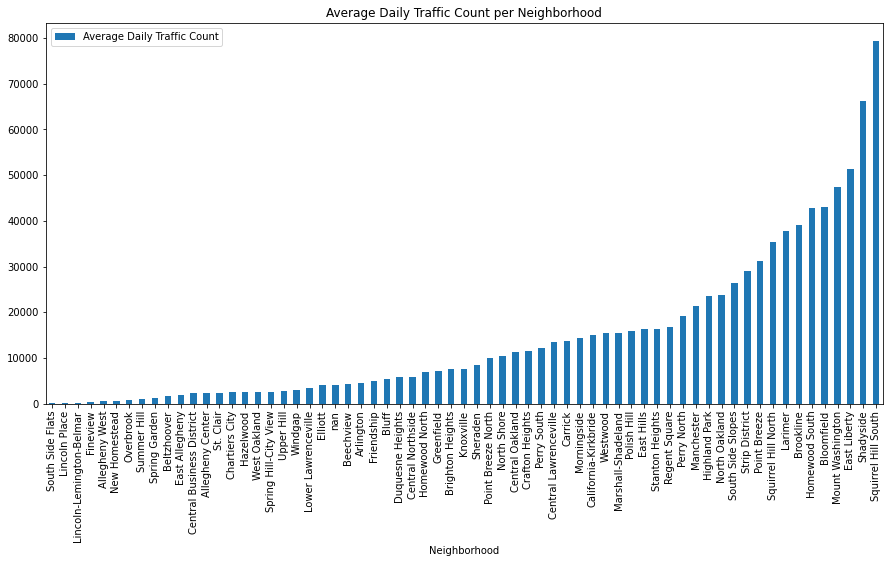

In [75]:
#Plotting
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)
countsdf.plot.bar(x = "Neighborhood" , y = "Average Daily Traffic Count" , rot = 90, title = "Average Daily Traffic Count per Neighborhood")
plt.show()

**This is a lot of data at once, so we can split it up and create two more graphs showing the 5 neighborhoods with the most traffic and the 5 neighborhoods with the least:**

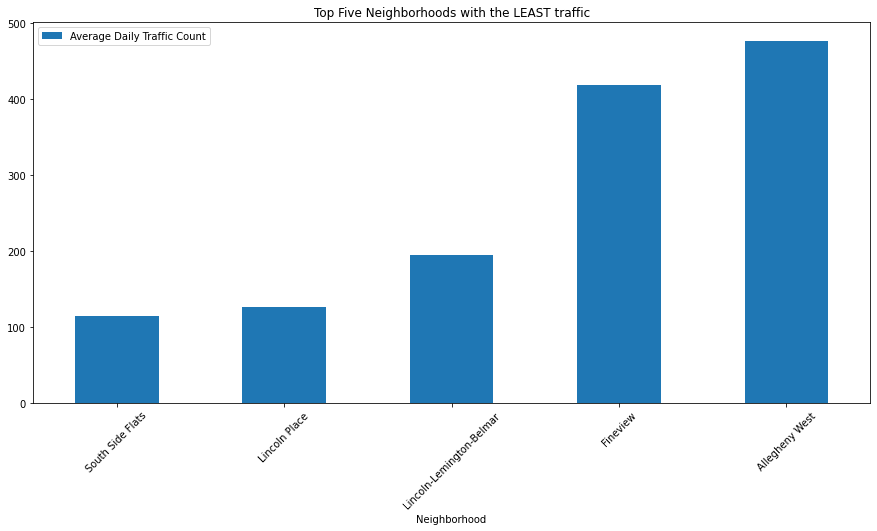

In [79]:

plt.rcParams["figure.figsize"] = (15,7)
countsdf.head(5).plot.bar(x = "Neighborhood" , y = "Average Daily Traffic Count" , rot = 45, title = "Top Five Neighborhoods with the LEAST traffic")
plt.show()

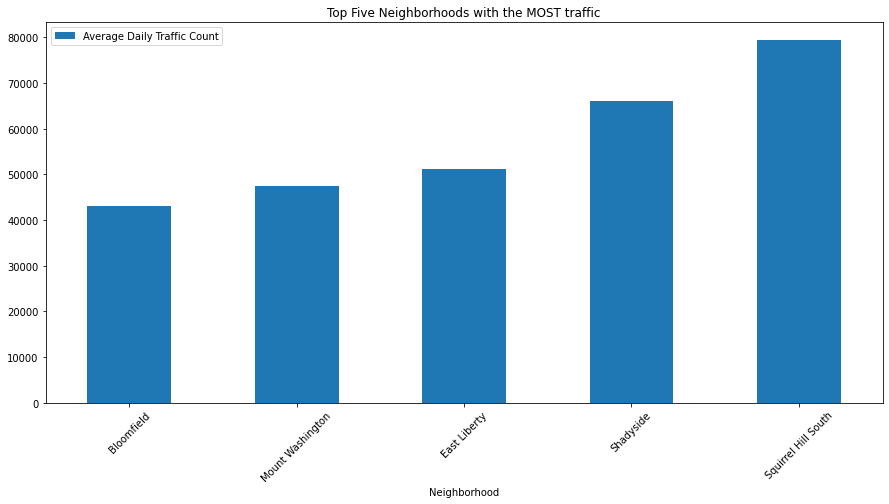

In [80]:
plt.rcParams["figure.figsize"] = (15,7)
countsdf.tail(5).plot.bar(x = "Neighborhood" , y = "Average Daily Traffic Count" , rot = 45, title = "Top Five Neighborhoods with the MOST traffic")
plt.show()

### Conclusion:
By looking at the data, we can determine that the five neighborhoods with the least amount of traffic are South Side Flats, Lincoln Place, Lincoln-Lemington-Belmar, Fairview, and Allegheny West. These neighborhoods would be considered the "best" for this metric, as the least amount of traffic indicates that the roads will be safer for children, and also these neighborhoods will have included benefits like better air quality and more open pedestrain space. Conversely, the five neighborhoods with the most traffic are Bloomfield, Mount Washington, East Liberty, Shadyside, and Squirrel Hill South. This areas are likely to suffer a lot of noise and air pollution, as well as more dangerous streets.

***

# Obesity Rates in Pittsburgh Neighborhoods

### By: Joe Paci <br> Dataset: [City of Pittsburgh Obesity Rates](https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh)

I chose this dataset to work with because neighborhoods with lower obesity rates should represent more active neighborhoods, these neighborhoods may have more playgrounds and less traffic, a correlation that we will look for in our final analysis. The data is gathered from another survey about the link between smoking and obesity

### Initial dataset info

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv("obesity.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   stname                         416 non-null    object 
 1   tractfips                      416 non-null    int64  
 2   2000 Tract                     416 non-null    int64  
 3   2010 Tract                     57 non-null     object 
 4   MUNICIPALITY                   416 non-null    object 
 5   Municipality                   416 non-null    object 
 6   City Neighborhood              140 non-null    object 
 7   2006-2010 estimate of obesity  416 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 26.1+ KB


### Sorted by neighborhood

 I used the sort_values() function to organize my data alphabetically by neighborhood.

In [5]:
obesity_df = df.sort_values(by=['City Neighborhood'])
obesity_df.head(20)

,stname,tractfips,2000 Tract,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,2006-2010 estimate of obesity
379,Pennsylvania,42003562700,220400,562700,PITTSBURGH,Pittsburgh,Allegheny Center,0.313581
378,Pennsylvania,42003562700,220100,562700,PITTSBURGH,Pittsburgh,Allegheny West,0.206399
66,Pennsylvania,42003180300,180300,NaN,PITTSBURGH,Pittsburgh,Allentown,0.353925
364,Pennsylvania,42003561600,160300,561600,PITTSBURGH,Pittsburgh,Arlington,0.334520
365,Pennsylvania,42003561600,160400,561600,PITTSBURGH,Pittsburgh,Arlington Heights,0.473120
78,Pennsylvania,42003202300,202300,NaN,PITTSBURGH,Pittsburgh,Banksville,0.239786
11,Pennsylvania,42003050900,50900,NaN,PITTSBURGH,Pittsburgh,Bedford Dwellings,0.636222
76,Pennsylvania,42003192000,192000,NaN,PITTSBURGH,Pittsburgh,Beechview,0.281814
72,Pennsylvania,42003191600,191600,NaN,PITTSBURGH,Pittsburgh,Beechview,0.295785
373,Pennsylvania,42003562400,180900,562400,PITTSBURGH,Pittsburgh,Beltzhoover,0.479978


### Average obesity rate per neighborhood, sorted from least to greatest

I used the groupby() and mean() functions to find the average obesity rate for neighborhoods where multiple datapoints were given. <br>All 27 neighborhoods listed below are above the national average obesity rate of 41.9%

In [8]:
simp_df = obesity_df.groupby('City Neighborhood')['2006-2010 estimate of obesity'].mean().sort_values(ascending=True)
simp_df.tail(27)

City Neighborhood
East Liberty                 0.429994
Chartiers City               0.438445
Chateau                      0.439386
Central Northside            0.442131
Perry South                  0.453424
Upper Hill                   0.455786
Arlington Heights            0.473120
Beltzhoover                  0.479978
Marshall-Shadeland           0.480103
Crawford Roberts             0.488691
Manchester                   0.498043
Fineview                     0.499129
Larimer                      0.517559
Garfield                     0.525117
East Hills                   0.562137
Homewood West                0.565710
Lincoln-Lemington-Belmar     0.578902
Homewood North               0.596425
Middle Hill                  0.608099
Homewood South               0.609697
Bedford Dwellings            0.636222
Central Business District    0.668012
Terrace Village              0.674103
Saint Clair                  0.699500
California Kirkbride         0.771046
Fairywood                    0.8

### Graph of obesity data sorted Highest to Lowest

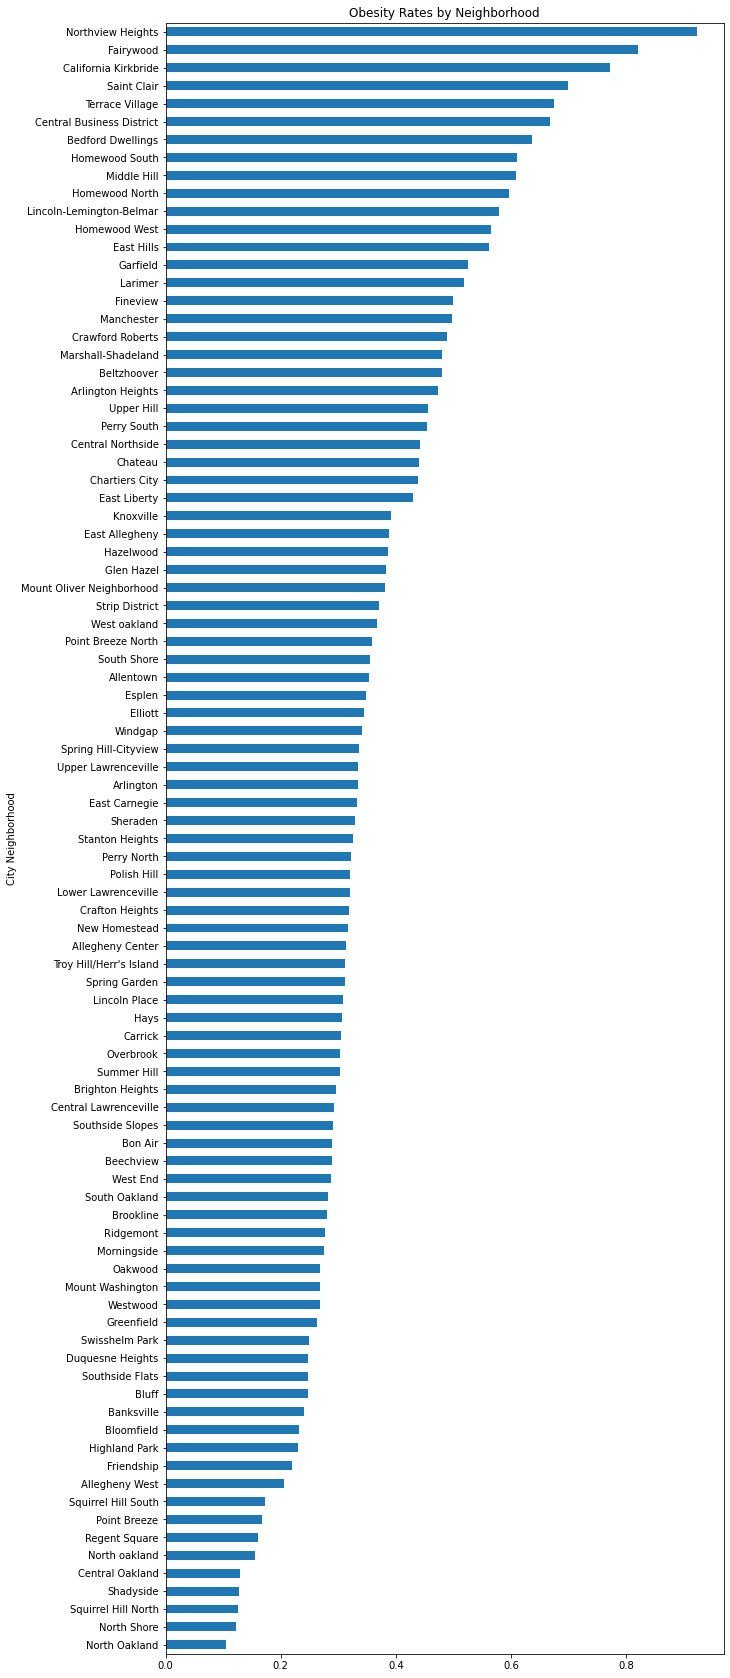

In [14]:
simp_df.plot.barh(x='2006-2010 estimate of obesity', figsize = (10,30), title = 'Obesity Rates by Neighborhood')

### Conclusion

For this particular metric I found that North Oakland is the best neighborhood becasue the obesity rates are the lowest, which could indicate a more active population. It is important to note that this data could be skewed slightly becasue many college students live in North Oakland. North Shore and Squirrel hill dont have this issue though, better representing a demographic of permenant residents.

***

# Playgrounds in Pittsburgh
### By:Jason Man
#### Dataset:https://data.wprdc.org/dataset/playgrounds/resource/47350364-44a8-4d15-b6e0-5f79ddff9367

### Intro
The dataset I chose was "City of Pittsburgh Playgrounds" which was dated from 2017 and last updated 2022. The metric listed all the playgrounds in the pittsburgh and the neighborhoods they were located in. I thought this was an effective dataset to measure general health and activity within the Pittsburgh area.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt  #import pandas and others

pp = pd.read_csv("PittPlaygrounds.csv") # read in csv file
play = pp[["name","neighborhood"]] #only read in relevant columns
play.head(100)

,name,neighborhood
0,Able Long Playground,Beechview
1,Albert Graham Playground,Crawford-Roberts
2,Alpine Playground,Central Northside
3,Alton Playground,Beechview
4,Ammon Playground,Bedford Dwellings
...,...,...
95,Schenley Bartlett Playground,Squirrel Hill South
96,Schenley Oval Playground,Squirrel Hill South
97,Schenley Overlook Playground,Squirrel Hill South
98,Sheraden Lower Playground,Sheraden


Here, I read in the csv file and displayed the raw data.

In [3]:
playSum = {} #create a dictionary and add up how many times each a neighborhood appears to count how many playgrounds there are for each
for index, row in play.iterrows():
    if(row["neighborhood"] in playSum):
        playSum[row["neighborhood"]] += 1
    else:
        playSum[row["neighborhood"]] = 1
print(playSum) #display the playground counts for each neighborhood
            


{'Beechview': 5, 'Crawford-Roberts': 3, 'Central Northside': 2, 'Bedford Dwellings': 1, 'South Side Slopes': 5, 'South Side Flats': 2, 'Lower Lawrenceville': 1, 'Banksville': 1, 'Homewood North': 1, 'Bon Air': 1, 'Central Oakland': 1, 'Brighton Heights': 2, 'Brookline': 2, 'Hazelwood': 3, 'Squirrel Hill South': 8, 'Spring Garden': 1, 'Lincoln-Lemington-Belmar': 2, 'Windgap': 1, 'Troy Hill': 2, 'Westwood': 1, 'Perry South': 1, 'Homewood West': 1, 'Allegheny Center': 4, 'Strip District': 1, 'Stanton Heights': 1, 'Crafton Heights': 2, 'West Oakland': 1, 'East Carnegie': 1, 'Duquesne Heights': 1, 'East Liberty': 3, 'Esplen': 1, 'Fairywood': 1, 'Highland Park': 4, 'Upper Lawrenceville': 3, 'Fineview': 1, 'Regent Square': 1, 'Garfield': 2, 'Greenfield': 2, 'South Oakland': 3, 'Allentown': 1, 'Hays': 1, 'Elliott': 3, 'Morningside': 2, 'Terrace Village': 1, 'Larimer': 1, 'Carrick': 3, 'Central Lawrenceville': 1, 'Lincoln Place': 2, 'Manchester': 2, 'Marshall-Shadeland': 2, 'Sheraden': 4, 'Belt

I then created a dictionary and iterated through the dataset to see how many times a neigborhood would show up to determine how many playgrounds there were.

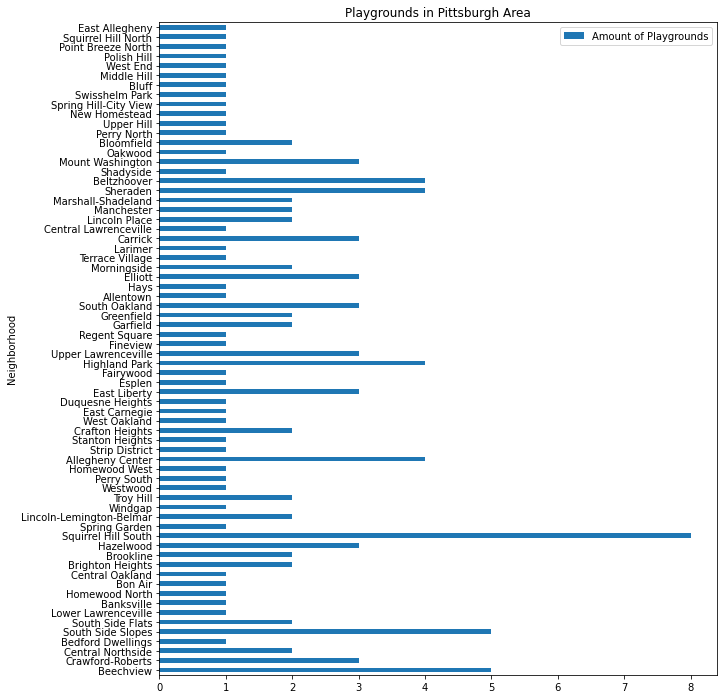

In [4]:
playData = pd.DataFrame(playSum.items()) #add it to the dataframe
playData.columns = ["Neighborhood","Amount of Playgrounds"]  #set columns
playData.head(150).plot.barh(x="Neighborhood", y="Amount of Playgrounds", title="Playgrounds in Pittsburgh Area", figsize=(10,12))
#plot horizontal bar graph

I finally added the information into a dataframe. Here, I was able to set the columns and could display a bar graph with the x axis being neighborhood name and the y axis being amount of parks to see which neighborhood had the most playgrounds.

### Conclusion

Ultimately, I could visualize the data through a graph to see which neighborhood was generally the most healthy and active that could be deemed the best in terms of having the most playgrounds. I found that the neighborhood that had the most playgrounds at 8 was Squirell Hill. I was surprised at this because I didn't know there were that many there. This was followed by a tie with South Side Flats and Beechview at 5. Additionally, many neighborhoods only had 1 playground. 

***

# Final Conclusion

By assigning a position to each neighborhood then calculating the average position across all three metrics, we were able to determine which neighborhood had the lowest average position and therefore which is the best. Through this process, we found that Beechview had the lowest average position of 17.6. The specific data that we gathered about Beechview was as follows: 
- Traffic: 4255: 23rd place 
- Obesity: .288799: 28th place 
- Playgrounds: 5: 2nd place 
- Average: 17.6 
